## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [7]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice.
## number of unique mouse
df['Mouse ID'].nunique()

249

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [22]:
# uniq_mouse = df["Mouse ID"].count()
# print(uniq_mouse)

In [24]:
duplicate_id = df.loc[df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_id



array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
aux=df.groupby(by=['Mouse ID','Timepoint'])['Drug Regimen'].count()
aux[aux>1].reset_index()


,Mouse ID,Timepoint,Drug Regimen
0,g989,0,2
1,g989,5,2
2,g989,10,2
3,g989,15,2
4,g989,20,2


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = df[df["Mouse ID"].isin(duplicate_id)==False]
clean_data["Mouse ID"].nunique()
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# alternative way 
clean_data = df[df["Mouse ID"]!='g989']
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

248

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

calc_mean = round(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(), 2)
calc_med = round(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(), 2)
calc_var = round(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(), 2)
calc_sd = round(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(), 2)
calc_sem = round(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(), 2)

summary_stat_table = pd.DataFrame({"Mean" : calc_mean, "Median" : calc_med, "Variance" : calc_var, "Standard Deviation" : calc_sd, "SEM" : calc_sem})
summary_stat_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ['mean','median','std','sem']})

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.322552  50.854632  6.507770  0.512884
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total number of timepoints for all mice tested for each drug regiment'}, xlabel='Drug Regimen', ylabel='Time Points'>

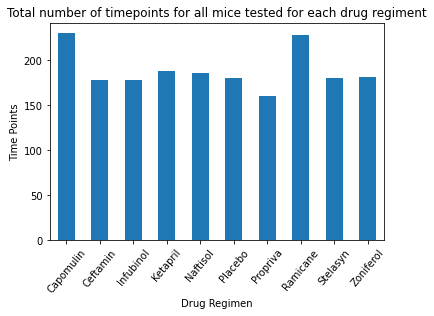

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
calc_total = df.groupby("Drug Regimen")["Timepoint"].count()
calc_total
calc_total.plot.bar(legend=False, rot=50, ylabel="Time Points", title="Total number of timepoints for all mice tested for each drug regiment")


In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

import matplotlib.pyplot as plt

In [67]:
regiment = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
timepoint = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

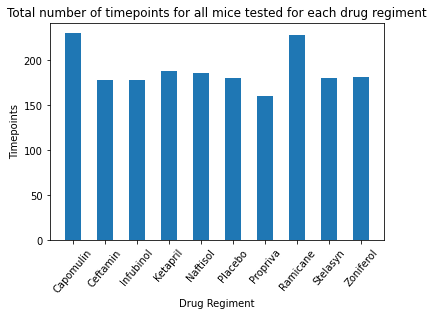

<Figure size 360x360 with 0 Axes>

In [69]:
plt.bar(regiment, timepoint ,width=0.5)
plt.title("Total number of timepoints for all mice tested for each drug regiment")
plt.ylabel("Timepoints")
plt.xlabel("Drug Regiment")
plt.xticks(rotation=50)
plt.figure(figsize=(5,5))
plt.show()

<AxesSubplot:ylabel='Sex'>

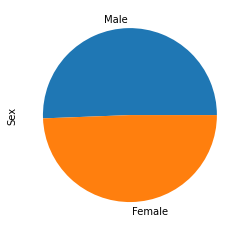

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df['Sex'].value_counts().plot.pie()


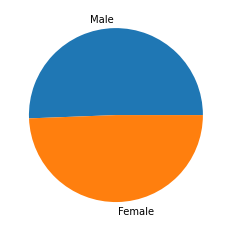

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df['Sex'].value_counts().values,labels = df['Sex'].value_counts().index);

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [85]:
regimens=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [88]:
df['Drug Regimen'].isin(regimens)

0        True
1        True
2        True
3        True
4        True
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Drug Regimen, Length: 1893, dtype: bool

In [94]:
df_red = df[df['Drug Regimen'].isin(regimens)]
df_last_timepoint=df_red.groupby(by = 'Drug Regimen').max()[['Timepoint','Tumor Volume (mm3)']]

In [95]:
df_last_timepoint

,Timepoint,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,45,48.158209
Ceftamin,45,68.923185
Infubinol,45,72.226731
Ramicane,45,47.622816


In [99]:
df_out = pd.merge(df_red,df_last_timepoint,left_on='Drug Regimen',right_index=True)
df_out

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites,Timepoint_y,Tumor Volume (mm3)_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45,47.622816
1,k403,Ramicane,Male,21,16,5,38.825898,0,45,47.622816
2,k403,Ramicane,Male,21,16,10,35.014271,1,45,47.622816
3,k403,Ramicane,Male,21,16,15,34.223992,1,45,47.622816
4,k403,Ramicane,Male,21,16,20,32.997729,1,45,47.622816
...,...,...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2,45,68.923185
1852,y865,Ceftamin,Male,23,26,30,59.033275,3,45,68.923185
1853,y865,Ceftamin,Male,23,26,35,61.153140,3,45,68.923185
1854,y865,Ceftamin,Male,23,26,40,63.469549,3,45,68.923185


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [132]:
treatment_list = list(df_out['Drug Regimen'].unique())
tumor_vol_data = []

In [136]:
for treatment in treatment_list:
    df_treatment=df_out[df_out['Drug Regimen'] == treatment]
    stats = df_treatment['Tumor Volume (mm3)_x'].describe()
    iqr = stats['75%']-stats['25%']
    lower_range = stats['25%']-1.5*iqr
    upper_range = stats['75%']+1.5*iqr
    outliers = ((df_treatment['Tumor Volume (mm3)_x']<lower_range) | (df_treatment['Tumor Volume (mm3)_x']>upper_range))
    print(treatment, df_treatment[outliers]['Mouse ID'].values, df_treatment[outliers]['Tumor Volume (mm3)_x'].values)
    tumor_vol_data.extend(df_treatment[outliers]['Tumor Volume (mm3)_x'].values)
    

Ramicane ['k403'] [22.05012627]
Capomulin ['s185' 's185'] [25.47214326 23.34359787]
Infubinol [] []
Ceftamin [] []


In [137]:
tumor_vol_data

[22.05012627, 25.47214326, 23.34359787]

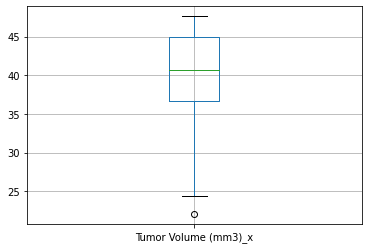

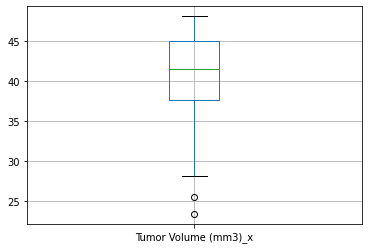

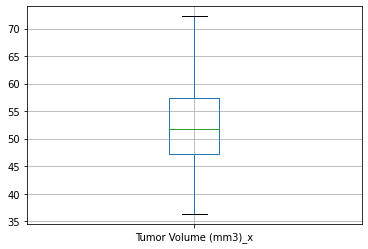

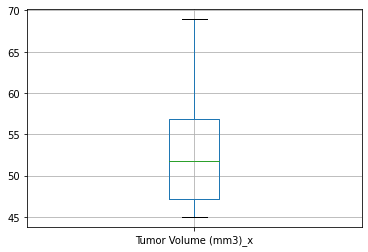

In [145]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for treatment in treatment_list:
    df_treatment = df_out[df_out['Drug Regimen'] == treatment]
    df_treatment.boxplot(column ='Tumor Volume (mm3)_x')
    plt.show()

<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

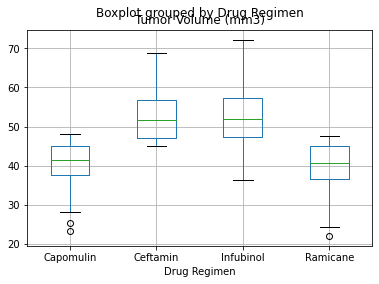

In [148]:
df_red.boxplot(by='Drug Regimen', column ='Tumor Volume (mm3)')

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


<AxesSubplot:xlabel='Timepoint'>

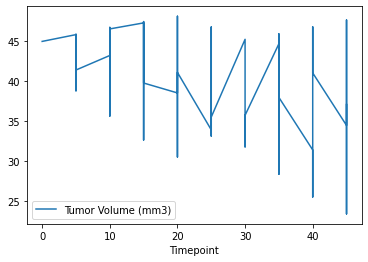

In [152]:
df[df['Drug Regimen']=='Capomulin'].sort_values(by='Timepoint').plot.line(x ='Timepoint', y ='Tumor Volume (mm3)')

<AxesSubplot:xlabel='Timepoint'>

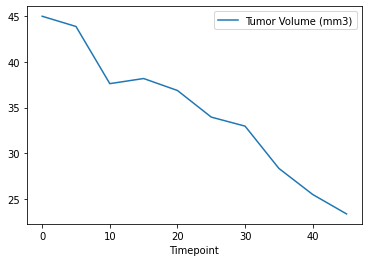

In [160]:
df[(df['Drug Regimen']=='Capomulin') & (df['Mouse ID']=='s185')].plot.line(x ='Timepoint',y ='Tumor Volume (mm3)')

In [161]:
# df[df['Drug Regimen']=='Capomulin'].plot.line(x='Timepoint',y='Tumor Volume (mm3)')

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

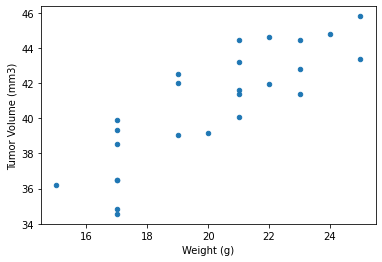

In [174]:
df[df['Drug Regimen']=='Capomulin'].groupby(by='Mouse ID').agg({'Weight (g)':'mean', 'Tumor Volume (mm3)':'mean'}).plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [178]:
df_weight_tumor=df[df['Drug Regimen']=='Capomulin'].groupby(by='Mouse ID').agg({'Weight (g)':'mean', 'Tumor Volume (mm3)':'mean'})
df_weight_tumor.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [179]:
from scipy.stats import linregress

In [185]:
x=df_weight_tumor['Weight (g)']
y=df_weight_tumor['Tumor Volume (mm3)']
result = linregress(x, y)
print(result.slope,result.intercept, result.intercept_stderr)

0.9544396890241045 21.552160532685015 2.590987686768349


In [186]:
# y = 0.95*x + 21.552
# tumor volume = 0.95*weight + 21.552

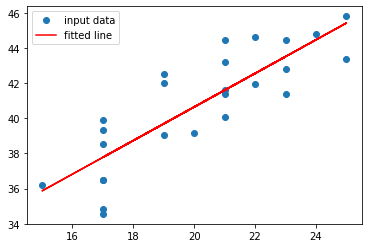

In [182]:
plt.plot(x, y, 'o', label='input data')
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()